# 라이브러리 로드 

In [1]:
import numpy as np
import pandas as pd
import glob

In [2]:
path = glob.glob('data/*.csv')
path

['data\\mall_customer.csv',
 'data\\PokemonDb.csv',
 'data\\star_classification.csv',
 'data\\StudentsPerformance.csv',
 'data\\wine.csv',
 'data\\WineQT.csv']

In [3]:
df = pd.read_csv(path[4])
df

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


# 열의 합 구하기 

In [4]:
#열의 합 
df['ash'].sum()

421.24

In [5]:
#for문을 활용한 열의 합 구하기

sum_ash = 0
for val in df['ash']: 
    sum_ash += val
print(sum_ash)

421.2400000000002


# 열의 평균 구하기 

In [6]:
#열의 평균 
df['ash'].mean()

2.3665168539325854

In [7]:
#for문을 활용한 열의 평균 구하기 

sum_ash = 0
for val in df['ash']:
    sum_ash += val
    mean_ash = sum_ash / len(df['ash'])
print(mean_ash)

2.3665168539325854


# 열의 분산 구하기 

In [8]:
#열의 분산 
df['ash'].var()

0.07526463530756043

In [9]:
#for문을 활용한 열의 분산 구하기 
ss_ash = 0

for val in df['ash']:
    ss_ash += (val - mean_ash) **2
var_ash = ss_ash / (len(df['ash']) - 1)
print(var_ash)

0.07526463530756043


# 열의 표준편차 구하기

In [10]:
# 열의 표준편차
df['ash'].std()

0.2743440090608148

In [11]:
#for 문을 활용한 열의 표준편차 구하기 

std_ash = var_ash**0.5
print(std_ash)

0.2743440090608148


# 열의 공분산 구하기

In [12]:
#공분산 
ash = df['ash']
ci = df['color_intensity']

In [13]:
np.cov(ash, ci)
#0.16465433 -> 공분산

array([[0.07526464, 0.16465433],
       [0.16465433, 5.37444938]])

In [14]:
n = len(df['ash'])
mean_ash = ash.mean()
mean_ci = ci.mean()

res = 0
for i in range(0,n):
    res += (ash[i] - mean_ash) * (ci[i] - mean_ci)
covariance = res / (n-1)
print(covariance)

0.16465432664889224


In [15]:
((ash - mean_ash).T @ (ci - mean_ci) / (n-1))
#@ 는 dot랑 같다 

0.1646543266488923

# 히스토그램 

In [16]:
import matplotlib.pyplot as plt

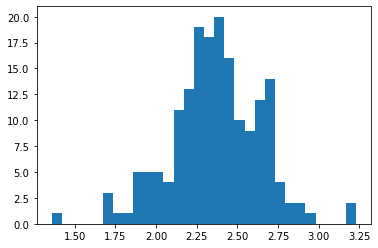

In [17]:
#표준정규분포
plt.hist(df['ash'], bins = 30)
plt.show()

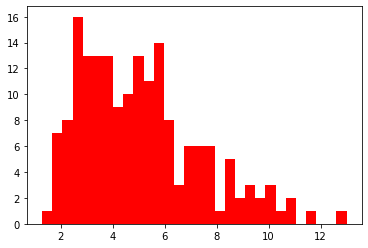

In [18]:
#카이제곱분포  / 감마분포 
plt.hist(df['color_intensity'], bins = 30, color = 'red')
plt.show()

In [19]:
#확률 - 미래 / 비율 - 과거

#ash > 2.5 일 때 color_intensity > 8일 확률
ash25 = df[df['ash'] > 2.5]
ci = ash25[ash25['color_intensity'] > 8]

In [20]:
len(ci) / len(ash25)

0.1346153846153846

# T_test_가설검정 - 귀무가설 / 대립가설

In [21]:
df_A = df[df['ash'] > 2.35]
df_B = df[df['ash'] <= 2.35] 

In [22]:
len(df_A)

92

In [23]:
len(df_B)

86

In [24]:
df_A['alcohol']

0      14.23
2      13.16
3      14.37
4      13.24
5      14.20
       ...  
172    14.16
173    13.71
174    13.40
176    13.17
177    14.13
Name: alcohol, Length: 92, dtype: float64

In [25]:
df_B['alcohol']

1      13.20
8      14.83
9      13.86
10     14.10
11     14.12
       ...  
165    13.73
167    12.82
170    12.20
171    12.77
175    13.27
Name: alcohol, Length: 86, dtype: float64

In [26]:
a = df_A['alcohol']
b = df_B['alcohol']

n1 = len(a)
n2 = len(b)

mean_a = a.mean()
mean_b = b.mean()
print(a)
print(b)

var_a = a.var()
var_b = b.var()

s = ((var_a / n1) + (var_b / n2)) ** 0.5
print(s)

0      14.23
2      13.16
3      14.37
4      13.24
5      14.20
       ...  
172    14.16
173    13.71
174    13.40
176    13.17
177    14.13
Name: alcohol, Length: 92, dtype: float64
1      13.20
8      14.83
9      13.86
10     14.10
11     14.12
       ...  
165    13.73
167    12.82
170    12.20
171    12.77
175    13.27
Name: alcohol, Length: 86, dtype: float64
0.11874509484834071


In [27]:
z_value = (mean_a - mean_b) / s
print(z_value)

2.9845945727230383


In [31]:
from scipy import stats

In [32]:
z_dist = stats.norm(0, 1)
p_value = 1- z_dist.cdf(z_value)

In [33]:
p_value

0.0014197720399459213

# 세 집단 평균차이 검정

In [34]:
df_A = df[df['ash'] < 2.28]
df_B = df[(df['ash'] >= 2.28) & (df['ash'] <= 2.47)]
df_C = df[df['ash'] > 2.47]

In [35]:
a = df_A['alcohol']
b = df_B['alcohol']
c = df_C['alcohol']

In [36]:
n1 = len(a)
n2 = len(b)
n3 = len(c)

print(n1)
print(n2)
print(n3)

59
58
61


In [38]:
#정규성 검정 


test_stat, p = stats.shapiro(a)
print("검정통계량 : {}, p-value : {}".format(test_stat, p))

test_stat, p = stats.shapiro(b)
print("검정통계량 : {}, p-value : {}".format(test_stat, p))

test_stat, p = stats.shapiro(c)
print("검정통계량 : {}, p-value : {}".format(test_stat, p))

검정통계량 : 0.9709163308143616, p-value : 0.16921241581439972
검정통계량 : 0.9692205190658569, p-value : 0.14712165296077728
검정통계량 : 0.9448610544204712, p-value : 0.008268149569630623


In [39]:
#분산 동질성 검정
stats.bartlett(a,b,c)

BartlettResult(statistic=1.2778020504975895, pvalue=0.5278722236377771)

In [41]:
f_val, p_val = stats.f_oneway(a,b,c)

print('F-통계량: ', f_val)
print('p-value: ', p_val)

F-통계량:  5.153211984906106
p-value:  0.006689793066378117


In [43]:
f_val, p_val = stats.kruskal(a,b,c)

print('F-통계량: ', f_val)
print('p-value: ', p_val)

F-통계량:  10.300136172298497
p-value:  0.0057990098811482715


# 와인데이터로 머신러닝 

In [44]:
X = df.iloc[:, 1:14]
y = df.iloc[:, 14]

In [45]:
X  # 행렬

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [46]:
y #벡터

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
173    2.0
174    2.0
175    2.0
176    2.0
177    2.0
Name: target, Length: 178, dtype: float64

In [47]:
# 트레이닝 / 테스트 데이터 분할


from sklearn.model_selection import train_test_split

X_tn, X_te, y_tn, y_te = train_test_split(X,y,random_state = 0)

In [49]:
# 데이터 표준화  : StandardScaler

from sklearn.preprocessing import

std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [51]:
#ensemble : Randomforest

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier (max_depth = 5, 
                                 random_state = 0)

clf_rf.fit(X_tn_std, y_tn)

RandomForestClassifier(max_depth=5, random_state=0)

In [52]:
# 예측
pred_rf = clf_rf.predict(X_te_std)
print(pred_rf)

[0. 2. 1. 0. 1. 1. 0. 2. 1. 1. 2. 2. 0. 1. 2. 1. 0. 0. 2. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 2. 0. 0. 1. 0. 0. 0. 2. 1. 1. 2. 0. 0. 1. 1. 1.]


In [54]:
#정확도

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_rf)
print(accuracy)

0.9777777777777777
